<a href="https://colab.research.google.com/github/baruchy/CouponSystem.web/blob/master/imdb_rnn/imdb_simple_rnn_embed_dimension_tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import SimpleRNN
from keras.datasets import imdb
from keras.callbacks import EarlyStopping

max_features = 20000
maxlen = 100  # cut texts after this number of words (among top max_features most common words)
batch_size = 32

print('Loading data...')

# <-------------- replacing code -------------->
# Code below results with error on google colab:
# (x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
# replacing to :

# save np.load
np_load_old = np.load

# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

# call load_data with allow_pickle implicitly set to true
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# restore np.load for future normal usage
np.load = np_load_old

# <-------------- end of new section -------------->
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

def createModel(max_features = 20000, output_dim = 128):  
  print('Build model...')
  model = Sequential()
  model.add(Embedding(max_features, output_dim))
  model.add(SimpleRNN(128, dropout=0.2, recurrent_dropout=0.2))
  model.add(Dense(1, activation='sigmoid'))
  
  model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
  return model

def trainModel(model, epochs = 15): 
  print('Train...')
  history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test), callbacks = [EarlyStopping(monitor='val_loss', mode='auto', patience = 3, verbose=1, restore_best_weights = True)])
  score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
  print('Test score:', score)
  print('Test accuracy:', acc)
  return history

def drawConvergenceGraph(history):
  # summarize history for accuracy
  plt.plot(history.history['acc'])
  plt.plot(history.history['val_acc'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
  # summarize history for loss
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
  
def testModelByEmbedDimensions(max_features = 20000, output_dim = 128, epochs = 10):
  model = createModel(max_features, output_dim)
  trainModel(model, epochs= epochs)
  drawConvergenceGraph(model.history)

Using TensorFlow backend.


Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 100)
x_test shape: (25000, 100)


W0821 14:36:25.334145 140269731088256 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0821 14:36:25.386943 140269731088256 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0821 14:36:25.398339 140269731088256 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0821 14:36:25.517555 140269731088256 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.



Build model...


W0821 14:36:25.548473 140269731088256 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
W0821 14:36:25.741148 140269731088256 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0821 14:36:25.790891 140269731088256 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0821 14:36:25.804969 140269731088256 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapp

Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 120s 5ms/step - loss: 0.6845 - acc: 0.5465 - val_loss: 0.6693 - val_acc: 0.5638
Epoch 2/10
25000/25000 [==============================] - 118s 5ms/step - loss: 0.6038 - acc: 0.6668 - val_loss: 0.6374 - val_acc: 0.6230
Epoch 3/10
25000/25000 [==============================] - 119s 5ms/step - loss: 0.5316 - acc: 0.7293 - val_loss: 0.6231 - val_acc: 0.6776
Epoch 4/10
25000/25000 [==============================] - 119s 5ms/step - loss: 0.4475 - acc: 0.7881 - val_loss: 0.6299 - val_acc: 0.6973
Epoch 5/10
25000/25000 [==============================] - 118s 5ms/step - loss: 0.4467 - acc: 0.7850 - val_loss: 0.7010 - val_acc: 0.6515
Epoch 6/10
25000/25000 [==============================] - 121s 5ms/step - loss: 0.3864 - acc: 0.8243 - val_loss: 0.6444 - val_acc: 0.6943
Restoring model weights from the end of the best epoch
Epoch 00006: early stopping
25000/25000 [=================

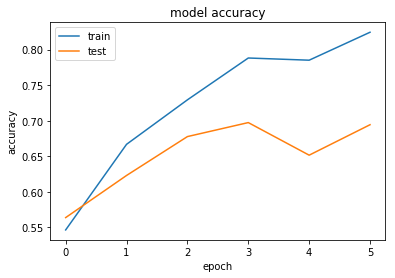

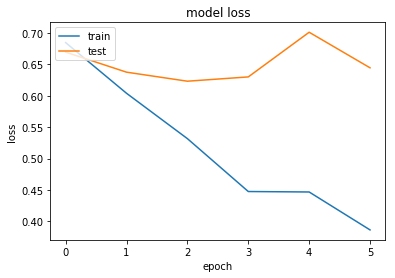

In [0]:
testModelByEmbedDimensions(20000, 128, 10)

Build model...
Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 122s 5ms/step - loss: 0.7010 - acc: 0.5152 - val_loss: 0.6869 - val_acc: 0.5394
Epoch 2/10
25000/25000 [==============================] - 125s 5ms/step - loss: 0.6579 - acc: 0.5989 - val_loss: 0.5711 - val_acc: 0.7103
Epoch 3/10
25000/25000 [==============================] - 122s 5ms/step - loss: 0.5347 - acc: 0.7334 - val_loss: 0.4879 - val_acc: 0.7774
Epoch 4/10
25000/25000 [==============================] - 122s 5ms/step - loss: 0.4493 - acc: 0.7998 - val_loss: 0.5492 - val_acc: 0.7250
Epoch 5/10
25000/25000 [==============================] - 123s 5ms/step - loss: 0.4509 - acc: 0.8064 - val_loss: 0.5330 - val_acc: 0.7417
Epoch 6/10
25000/25000 [==============================] - 123s 5ms/step - loss: 0.4162 - acc: 0.8198 - val_loss: 0.5538 - val_acc: 0.7192
Restoring model weights from the end of the best epoch
Epoch 00006: early stopping
25000/25000 [==

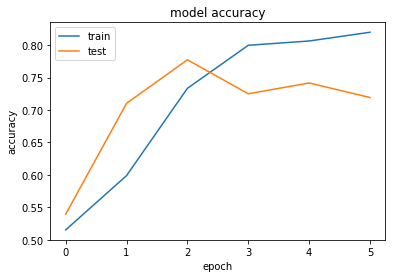

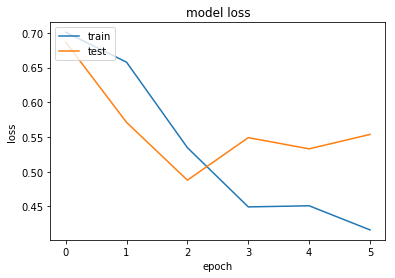

In [0]:
testModelByEmbedDimensions(20000, 64, 10)

Build model...
Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 104s 4ms/step - loss: 0.7026 - acc: 0.5123 - val_loss: 0.6863 - val_acc: 0.5402
Epoch 2/10
25000/25000 [==============================] - 101s 4ms/step - loss: 0.6796 - acc: 0.5567 - val_loss: 0.6667 - val_acc: 0.5916
Epoch 3/10
25000/25000 [==============================] - 104s 4ms/step - loss: 0.6228 - acc: 0.6461 - val_loss: 0.6337 - val_acc: 0.6283
Epoch 4/10
25000/25000 [==============================] - 103s 4ms/step - loss: 0.5571 - acc: 0.7108 - val_loss: 0.6267 - val_acc: 0.6638
Epoch 5/10
25000/25000 [==============================] - 101s 4ms/step - loss: 0.4862 - acc: 0.7642 - val_loss: 0.5692 - val_acc: 0.7192
Epoch 6/10
25000/25000 [==============================] - 102s 4ms/step - loss: 0.4732 - acc: 0.7719 - val_loss: 0.5756 - val_acc: 0.7227
Epoch 7/10
25000/25000 [==============================] - 103s 4ms/step - loss: 0.4722 - acc: 0.77

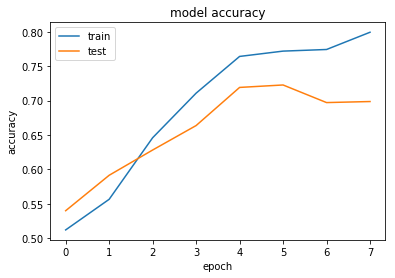

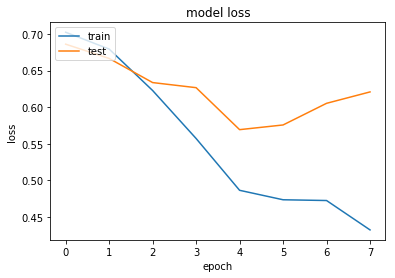

In [0]:
testModelByEmbedDimensions(20000, 32, 10)

Build model...
Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 97s 4ms/step - loss: 0.7039 - acc: 0.5022 - val_loss: 0.6894 - val_acc: 0.5382
Epoch 2/10
25000/25000 [==============================] - 94s 4ms/step - loss: 0.6888 - acc: 0.5355 - val_loss: 0.6824 - val_acc: 0.5375
Epoch 3/10
25000/25000 [==============================] - 94s 4ms/step - loss: 0.6528 - acc: 0.6083 - val_loss: 0.6513 - val_acc: 0.6015
Epoch 4/10
25000/25000 [==============================] - 95s 4ms/step - loss: 0.6168 - acc: 0.6503 - val_loss: 0.6449 - val_acc: 0.6234
Epoch 5/10
25000/25000 [==============================] - 93s 4ms/step - loss: 0.5712 - acc: 0.6942 - val_loss: 0.6251 - val_acc: 0.6599
Epoch 6/10
25000/25000 [==============================] - 94s 4ms/step - loss: 0.5216 - acc: 0.7382 - val_loss: 0.6084 - val_acc: 0.6972
Epoch 7/10
25000/25000 [==============================] - 94s 4ms/step - loss: 0.4800 - acc: 0.7727 - va

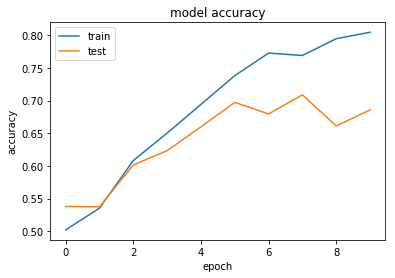

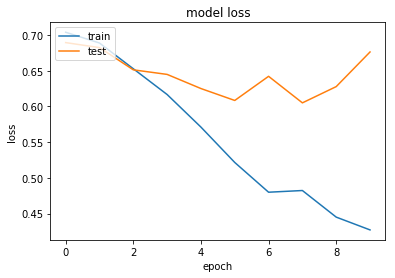

In [0]:
testModelByEmbedDimensions(20000, 16, 10)

W0821 19:57:27.996095 140623305385856 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0821 19:57:28.054905 140623305385856 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0821 19:57:28.063171 140623305385856 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



Build model...


W0821 19:57:28.302320 140623305385856 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0821 19:57:28.372330 140623305385856 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
W0821 19:57:28.757557 140623305385856 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0821 19:57:28.882361 140623305385856 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tenso

Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 86s 3ms/step - loss: 0.7001 - acc: 0.5100 - val_loss: 0.7005 - val_acc: 0.5000
Epoch 2/10
25000/25000 [==============================] - 83s 3ms/step - loss: 0.6833 - acc: 0.5438 - val_loss: 0.6699 - val_acc: 0.5608
Epoch 3/10
25000/25000 [==============================] - 85s 3ms/step - loss: 0.6211 - acc: 0.6476 - val_loss: 0.6588 - val_acc: 0.5979
Epoch 4/10
25000/25000 [==============================] - 83s 3ms/step - loss: 0.5638 - acc: 0.7024 - val_loss: 0.6605 - val_acc: 0.6106
Epoch 5/10
25000/25000 [==============================] - 84s 3ms/step - loss: 0.5167 - acc: 0.7364 - val_loss: 0.6860 - val_acc: 0.6221
Epoch 6/10
25000/25000 [==============================] - 83s 3ms/step - loss: 0.4982 - acc: 0.7484 - val_loss: 0.6602 - val_acc: 0.6261
Restoring model weights from the end of the best epoch
Epoch 00006: early stopping
25000/25000 [=======================

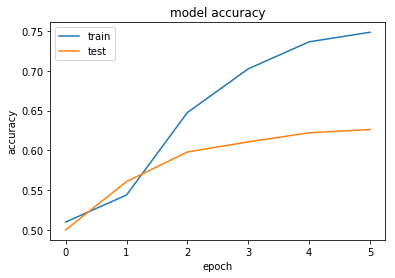

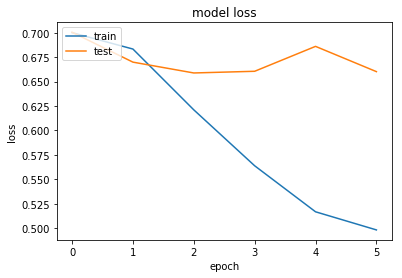

In [2]:
testModelByEmbedDimensions(20000, 8, 10)

Build model...
Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 83s 3ms/step - loss: 0.7046 - acc: 0.5008 - val_loss: 0.6926 - val_acc: 0.5125
Epoch 2/10
25000/25000 [==============================] - 82s 3ms/step - loss: 0.6977 - acc: 0.5138 - val_loss: 0.7085 - val_acc: 0.5000
Epoch 3/10
25000/25000 [==============================] - 81s 3ms/step - loss: 0.6815 - acc: 0.5526 - val_loss: 0.6719 - val_acc: 0.5636
Epoch 4/10
25000/25000 [==============================] - 81s 3ms/step - loss: 0.6058 - acc: 0.6619 - val_loss: 0.5517 - val_acc: 0.7214
Epoch 5/10
25000/25000 [==============================] - 82s 3ms/step - loss: 0.5212 - acc: 0.7462 - val_loss: 0.5141 - val_acc: 0.7539
Epoch 6/10
25000/25000 [==============================] - 81s 3ms/step - loss: 0.4450 - acc: 0.7996 - val_loss: 0.5014 - val_acc: 0.7603
Epoch 7/10
25000/25000 [==============================] - 81s 3ms/step - loss: 0.4285 - acc: 0.8103 - va

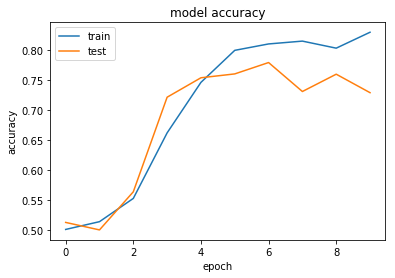

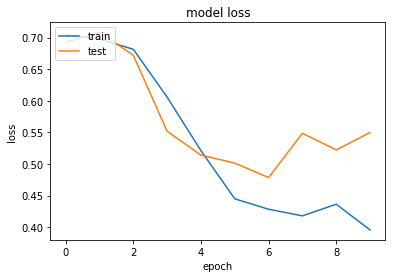

In [3]:
testModelByEmbedDimensions(20000, 4, 10)

Build model...
Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 85s 3ms/step - loss: 0.7057 - acc: 0.4998 - val_loss: 0.6982 - val_acc: 0.5084
Epoch 2/10
25000/25000 [==============================] - 87s 3ms/step - loss: 0.6988 - acc: 0.4997 - val_loss: 0.7008 - val_acc: 0.4908
Epoch 3/10
25000/25000 [==============================] - 81s 3ms/step - loss: 0.6963 - acc: 0.5065 - val_loss: 0.6928 - val_acc: 0.5095
Epoch 4/10
25000/25000 [==============================] - 85s 3ms/step - loss: 0.6957 - acc: 0.5054 - val_loss: 0.6918 - val_acc: 0.5083
Epoch 5/10
25000/25000 [==============================] - 79s 3ms/step - loss: 0.6892 - acc: 0.5307 - val_loss: 0.6795 - val_acc: 0.5552
Epoch 6/10
25000/25000 [==============================] - 80s 3ms/step - loss: 0.6576 - acc: 0.6004 - val_loss: 0.6675 - val_acc: 0.5781
Epoch 7/10
25000/25000 [==============================] - 81s 3ms/step - loss: 0.6188 - acc: 0.6552 - va

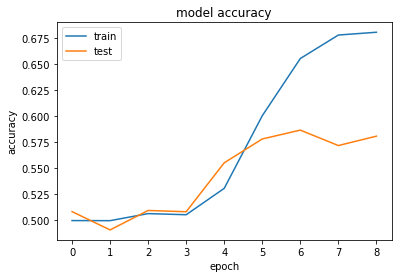

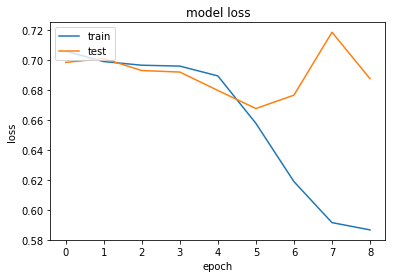

In [4]:
testModelByEmbedDimensions(20000, 2, 10)

# Above 128 output dimension

Build model...
Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/3
25000/25000 [==============================] - 255s 10ms/step - loss: 0.6749 - acc: 0.5594 - val_loss: 0.6382 - val_acc: 0.6221
Epoch 2/3
25000/25000 [==============================] - 251s 10ms/step - loss: 0.5772 - acc: 0.6929 - val_loss: 0.5980 - val_acc: 0.6695
Epoch 3/3
25000/25000 [==============================] - 29s 1ms/step
Test score: 0.5707968190765381
Test accuracy: 0.71608


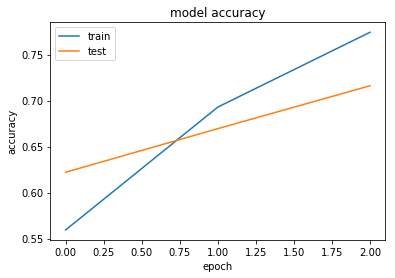

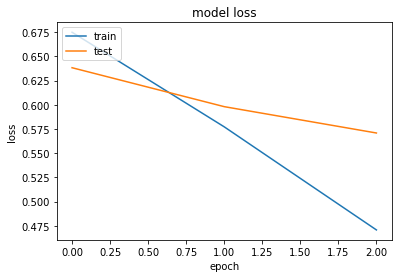

In [5]:
testModelByEmbedDimensions(20000, 256, 3)

Build model...
Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/1
25000/25000 [==============================] - 46s 2ms/step
Test score: 0.5938736074638367
Test accuracy: 0.66996


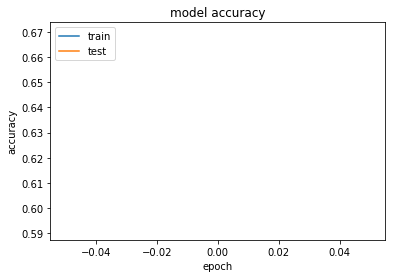

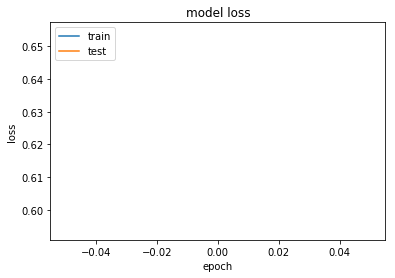

In [6]:
testModelByEmbedDimensions(20000, 512, 1)